# Hass Consulting Company real estate Analysis: 
## factors that affect housing prices and a model that allows the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## 1. Defining the Question

### a) Specifying the Question


> You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.




### b) Defining the Metric for Success
<p> Rank of home team
<p> Rank of away team
<p> Tournament type

### c) Understanding the context 
<p> Real esteta pricing depends on many facteros... Same houses build with same number of bedrooms and area can fetch different prices in fdifferent locations. 
<p> Pricing is also affected by the interest rates in that area. 

### d) Recording the Experimental Design
<p> This project will be understake by doing a logistic regresions. I will train a model using tournament type, home team, away teamand Fifa ranking on the results which is win, draw or lose. Fifa ranking changes per year hence when feeding the model for prediting will have the year which will determin the team's ranking that year. 

### e) Data Relevance
<p> We have two data sets to work with
<p> 1. The Fifa ranking dataset which shows ranking for each team periodically. We will comeupe with a new dataset from this that displays the ranking per team per year
<p> 2.,. Fifa resuls: This shows each game results whenever the teams play. It has the date, teams, tournament type, and score. With this we will append results(W,D,L) and official Fifa ranking that year depending on the year they have played. 

## 2. Reading the Data

In [1]:
# Loading the Dataset
# Dataset url =http://bit.ly/IndependentProjectWeek7Dataset 
#

## 3. Checking the Data

### Importing required libraries 

In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt


### Load data

In [2]:
houses = pd.read_csv('data/house_data.csv')



In [3]:
# Determining the no. of records in our dataset
houses.shape

(21613, 20)

In [4]:
# Previewing the top of our dataset
houses.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
houses['geocode_data'] = ''
houses['city'] = ''
houses['country'] = ''

In [11]:
import requests
def reverse_geocode(latlng):
    result = {}
    url = 'https://maps.googleapis.com/maps/api/geocode/json?latlng={}'
    request = url.format(latlng)
    data = requests.get(request).json()
    if len(data['results']) > 0:
        result = data['results'][0]
    return result

In [19]:
longlat = houses[['lat','long']].values
#houses['geocode_data'] = houses['latlng'].map(reverse_geocode)

In [21]:
def reverse_geocode(latlng):
    result = {}
    url = 'https://maps.googleapis.com/maps/api/geocode/json?latlng={}'
    request = url.format(latlng)
    data = requests.get(request).json()
    if len(data['results']) > 0:
        result = data['results'][0]
    return result

In [1]:
#houses['geocode_data'] = longlat.map(reverse_geocode)

In [7]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
categorical_features = ['tournament']
le = LabelEncoder()

# Converting the variables to numerical
#
for i in range(1):
    new = le.fit_transform(fifa_results[categorical_features[i]])
    fifa_results[categorical_features[i]] = new
    
fifa_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,54,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,54,London,England,False
2,1874-03-07,Scotland,England,2,1,54,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,54,London,England,False
4,1876-03-04,Scotland,England,3,0,54,Glasgow,Scotland,False


In [8]:
# Previewing the bottom of our dataset
fifa_ranking.head()
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
categorical_features = ['tournament']
le = LabelEncoder()

# Converting the variables to numerical
#

new = le.fit_transform(fifa_ranking['confederation'])
fifa_ranking['confederation'] = new
    
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1993-08-08


In [9]:
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1993-08-08


### checking and making sure each colum has appropriate data types 

In [5]:
# Checking whether Fifa ranking has an appropriate datatype
#
houses.info()
#Date  need to be converted


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [11]:
# convert date colukns to date type
fifa_ranking['rank_date']=pd.to_datetime(fifa_ranking['rank_date'])


In [12]:
#Fifa results data types
#convert date to date type
fifa_results['date']=pd.to_datetime(fifa_results['date'])
fifa_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  int32         
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int32(1), int64(2), object(4)
memory usage: 2.4+ MB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

<p> We took some records of fifa ranking and checked against official fifa ranking. Its correct. We also checked games played over time and realized the data given is correct representation of FIFA football match played. 

## 5. Tidying the Dataset

In [13]:
# Checking for Outliers
#

In [14]:
# Checking for Anomalies
#

<AxesSubplot:>

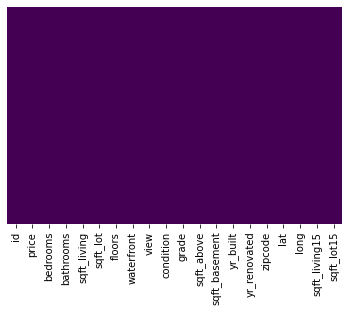

In [6]:
# Identifying the Missing Data
sns.heatmap(houses.isnull(), yticklabels=False,cbar=False, cmap='viridis')


In [7]:
# missing data in the fifa ranking 

#sns.heatmap(fifa_ranking.isnull(), yticklabels=False,cbar=False, cmap='viridis')
houses.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Seems there are no missing values. However, when we merge the dataset or assign the values of ranking to fifa results table we are likely to get missing values 

In [17]:
# Dealing with the Missing Data
#

###  More data cleaning procedures

In [30]:
# add results D,W,L as per the match results
#create status column for home perspective 
def status_col(home_score,away_score):
    if home_score>away_score:
        results = 'W'
    elif home_score<away_score:
        results = 'L'
    else:
        results = 'D'
    return results
fifa_df['Results'] = fifa_df.apply(lambda x: status_col(x['home_score'], x['away_score']), axis=1)

In [31]:
#convert tournaments to categorial 
def convert_categorical_cols(data,col):
    colum_values = list(data[col].unique())
    dicts = {}
    values = range(len(colum_values))
    for i in range(len(colum_values)):
        dicts[colum_values[i]] = values[i]
        values = range(len(colum_values))
    print(dicts)
    data[col]=data[col].map(dicts)
#The function takes the dataset and the column and create a dictionary that maps all unique 
# column values to numerical values for machine learning 
convert_categorical_cols(fifa_df,'tournament')

{'Friendly': 0, 'African Cup of Nations qualification': 1, 'FIFA World Cup qualification': 2, 'Nehru Cup': 3, 'Merdeka Tournament': 4, "King's Cup": 5, 'UNCAF Cup': 6, 'Copa Paz del Chaco': 7, 'Kirin Cup': 8, 'CFU Caribbean Cup qualification': 9, 'CFU Caribbean Cup': 10, 'USA Cup': 11, 'Copa América': 12, 'Korea Cup': 13, 'Baltic Cup': 14, 'Gold Cup': 15, 'Amílcar Cabral Cup': 16, 'United Arab Emirates Friendship Tournament': 17, 'Malta International Tournament': 18, 'African Cup of Nations': 19, 'FIFA World Cup': 20, 'Oceania Nations Cup qualification': 21, 'UEFA Euro qualification': 22, 'Gulf Cup': 23, 'Simba Tournament': 24, 'CECAFA Cup': 25, 'Confederations Cup': 26, 'Dynasty Cup': 27, 'SAFF Cup': 28, 'South Pacific Games': 29, 'Oceania Nations Cup': 30, 'Windward Islands Tournament': 31, 'AFC Asian Cup qualification': 32, 'Lunar New Year Cup': 33, 'UEFA Euro': 34, 'AFF Championship': 35, 'AFC Asian Cup': 36, 'King Hassan II Tournament': 37, 'Cyprus International Tournament': 38, '

## 6. Exploratory Analysis

In [8]:
# Chcck the correlations between numeric variables 
houses.corr()

#It shows that home score is negatively correlated to home rank. 
# This is because when a rank is high, the team perfemace is not good
#same case for away rank and score. 


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Text(0, 0.5, 'COUNT')

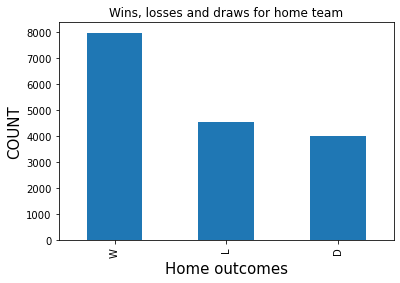

In [34]:
#Plot a graph on the for wins losses and draws for home team
#This shows that home teams win more than away team. Draws and losses seems to be balanced. 
fifa_df['Results'].value_counts().plot(kind='bar')
plt.title("Wins, losses and draws for home team")
plt.xlabel("Home outcomes",fontsize=15)
plt.ylabel("COUNT",fontsize=15)



## 7. Implementing the Solution

### Using logistics regression 

In [35]:
#Logistic regression model 
X = fifa_df[['tournament','Home_rank','Away_rank']]
y = fifa_df['Results']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [36]:
#making predictions 
predictions = logmodel.predict(X_test)


In [37]:
#check perfomance 
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))
print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
print(print('Accuracy' , accuracy_score(y_test, predictions)))
#The model has performed averagely 55% which is not soo good to help in predicting
#For draws, the models was unable to predict any. Its mostly able to predict win or loss


              precision    recall  f1-score   support

           D       0.00      0.00      0.00       777
           L       0.48      0.52      0.50       937
           W       0.58      0.84      0.69      1586

    accuracy                           0.55      3300
   macro avg       0.36      0.45      0.40      3300
weighted avg       0.42      0.55      0.47      3300

[[   0  264  513]
 [   0  489  448]
 [   0  256 1330]]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Accuracy 0.5512121212121213
None


C:\Users\ronal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 8. Challenging the solution

> Our model might not be able to give correct predition given the surprising perfomance of footbal teams. Some teams that are highly ranked are beaten hence a winn turns to be a loss







In [38]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?
Yes. Data given was well and enough to create  a model 

### b). Do we need other data to answer our question?

No

### c). Did we have the right question?

The question is well framed. Many companies need such questiona nd models to help gamblers predict the outcomes of games. Betting companies also need such models to know the odds to place on their games to avoid losses in betting.